In [1]:
#import of packages 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

In [2]:
# import of 21in14ar.xls from line 7-27 and only 3 first columns
data_raw = pd.read_excel('21in14ar.xlsx', header=7, usecols=[0,1,2])

# renaming of columns
data_raw.columns = ['Size of adjusted gross income', 'Number of returns', 'Adjusted gross income less deficit']

# dropping rows after 20th row no matter the value
data_raw = data_raw.drop(data_raw.index[20:])

# adjusting data type
data_raw['Number of returns'] = data_raw['Number of returns'].astype(int)
data_raw['Adjusted gross income less deficit'] = data_raw['Adjusted gross income less deficit'].astype(int)

# printing of data
data_raw.head()

,Size of adjusted gross income,Number of returns,Adjusted gross income less deficit
0,"All returns, total",160824340,14795614070
1,No adjusted gross income,4098522,-171836364
2,"$1 under $5,000",8487025,19987243
3,"$5,000 under $10,000",8944908,67651359
4,"$10,000 under $15,000",10056377,125912056


In [3]:
data = data_raw.copy()

# transpose the data such that first row is made into a column added to the data
all_returns = data.iloc[:2]

# drop first column, subtracting returns with no AGI the and renaming columns
all_returns = all_returns.drop(labels='Size of adjusted gross income', axis=1)
all_returns = (all_returns.iloc[0]-all_returns.iloc[1])
all_returns = all_returns.to_frame().T
all_returns.columns = ['Total number of returns', 'Total adjusted gross income less deficit']

# dropping first 2 rows with totals and no AGI
data = data.drop(data.index[:2])

# adding a 0 row to the data as the first row and resetting the index
data = pd.concat([pd.DataFrame({'Size of adjusted gross income': ['0'], 'Number of returns': [0], 'Adjusted gross income less deficit': [0]}), data], ignore_index=True)
data = data.reset_index(drop=True)

# joining the data
data = data.join(all_returns, how='cross')

# calculating the percentage of total returns
data['Percentage of total returns'] = data['Number of returns'] / data['Total number of returns']
data['Percentage of total AGI'] = data['Adjusted gross income less deficit'] / data['Total adjusted gross income less deficit']

data['Cumsum percentage of total returns'] = np.cumsum(data['Percentage of total returns'])
data['Cumsum percentage of total AGI'] = np.cumsum(data['Percentage of total AGI'])


data.head()

,Size of adjusted gross income,Number of returns,Adjusted gross income less deficit,Total number of returns,Total adjusted gross income less deficit,Percentage of total returns,Percentage of total AGI,Cumsum percentage of total returns,Cumsum percentage of total AGI
0,0,0,0,156725818,14967450434,0.000000,0.000000,0.000000,0.000000
1,"$1 under $5,000",8487025,19987243,156725818,14967450434,0.054152,0.001335,0.054152,0.001335
2,"$5,000 under $10,000",8944908,67651359,156725818,14967450434,0.057074,0.004520,0.111226,0.005855
3,"$10,000 under $15,000",10056377,125912056,156725818,14967450434,0.064165,0.008412,0.175391,0.014268
4,"$15,000 under $20,000",9786580,170836129,156725818,14967450434,0.062444,0.011414,0.237835,0.025682


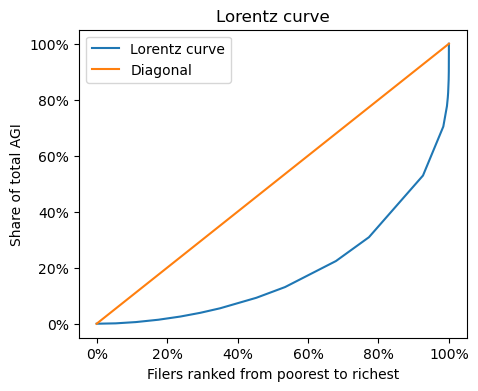

In [4]:
# plotting the lorentz curve and the diagonal
plt.figure(figsize=(5,4))
plt.plot(data['Cumsum percentage of total returns'], data['Cumsum percentage of total AGI'], label='Lorentz curve')
plt.plot(np.linspace(0.0,1.0,len(data)), np.linspace(0.0,1.0,len(data)), label='Diagonal')
plt.title('Lorentz curve')
plt.xlabel('Filers ranked from poorest to richest')
plt.ylabel('Share of total AGI')

# set x and y axis in pct
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: '{:.0f}%'.format(x*100)))
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: '{:.0f}%'.format(x*100)))

plt.legend()

# saving the plot
plt.savefig('lorentz_curve.png')

plt.show()

In [5]:
# calculating the Gini coefficient
area = (np.trapz(np.linspace(0.0,1.0,len(data)), np.linspace(0.0,1.0,len(data))) 
        - np.trapz(data['Cumsum percentage of total AGI'], data['Cumsum percentage of total returns']))
gini = area/np.trapz(np.linspace(0.0,1.0,len(data)), np.linspace(0.0,1.0,len(data)))

print('Gini coefficient:', gini)

Gini coefficient: 0.627922555865702
